In [116]:
import pandas
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

### Importando dataset

In [117]:
data_source = pandas.read_csv('Manaus.csv', sep=';', encoding='ISO-8859-1', low_memory=False)

### Visão Geral dos Casos Confirmados

#### 1. Quantos atributos descrevem cada exemplo? Quais são eles?

In [118]:
print("São", len(data_source.columns), "atributos")

São 36 atributos


In [119]:
print("Os atributos são: ", [item for item in data_source.columns])

Os atributos são:  ['_idade', '_faixa etária', '_sexo', '_bairro', '_classificacao', '_comorb_renal', '_comorb_diabetes', '_comorb_imuno', '_comorb_cardio', '_conclusao', '_dt_notificacao', '_taxa', '_dt_evolucao', '_raca', '_dt_sintomas', '_criterio', '_tipo_teste', '_sintoma_garganta', '_sintoma_dispneia', '_sintoma_febre', '_sintoma_tosse', '_sintoma_outros', '_etnia', '_profiss_saude', '_srag', '_se_notificacao', '_distrito', '_bairro_mapa', '_comorb_respiratoria', '_comorb_cromossomica', '_comorb_hepatica', '_comorb_neurologica', '_comorb_hemato', '_comorb_obessidade', '_origem', '_evolução']


#### 2. Quantos casos confirmados há em Manaus, cumulativamente?

In [120]:
print("São", data_source['_classificacao'].value_counts()['Confirmado'], "casos confirmados")

São 37218 casos confirmados


#### 3. A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.

In [122]:
# confirm _dt_notificacao to date type
data_source['_dt_notificacao'] = pandas.to_datetime(data_source['_dt_notificacao'], format='%d/%m/%Y')

# l = [datetime.strptime(item, '%d/%m/%Y').date() for item in data_source['_dt_notificacao'].dropna()]
print("O registro mais antigo:", min(data_source['_dt_notificacao']))
print("O registro mais recente:", max(data_source['_dt_notificacao']))

O registro mais antigo: 2020-01-03 00:00:00
O registro mais recente: 2020-08-07 00:00:00


### Limpeza de dados

#### Removendos atributos irrelevantes para o contexto

In [123]:
data_clean = data_source.drop(columns=['_comorb_renal', '_comorb_diabetes', '_comorb_imuno',
                                       '_comorb_cardio', '_dt_evolucao', '_raca', '_dt_sintomas',
                                       '_etnia', '_comorb_respiratoria', '_comorb_cromossomica',
                                       '_comorb_hepatica', '_comorb_neurologica', '_comorb_hemato',
                                       '_comorb_obessidade'])
data_clean.head(5)

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_taxa,_criterio,_tipo_teste,...,_sintoma_febre,_sintoma_tosse,_sintoma_outros,_profiss_saude,_srag,_se_notificacao,_distrito,_bairro_mapa,_origem,_evolução
0,30.0,30a - 39a,M,JAPIIM,Confirmado,NaN,2020-05-04,"0,173837462",NaN,RT-PCR,...,Sim,Não,Não,Não,NaN,19.0,SUL,JAPIIM,"eSUS VE,",NaN
1,30.0,30a - 39a,M,FLORES,Confirmado,NaN,2020-05-04,"0,198306463",NaN,RT-PCR,...,Sim,Sim,Não,Não,NaN,19.0,SUL,FLORES,"eSUS VE,",NaN
2,54.0,50a - 59a,M,TANCREDO NEVES,Em análise,Recuperado,2020-04-25,"0,169058849",NaN,NaN,...,Sim,Sim,Não,Não,NaN,17.0,LESTE,TANCREDO NEVES,"eSUS VE,",NaN
3,43.0,40a - 49a,F,FLORES,Confirmado,NaN,2020-05-04,"0,198306463",NaN,RT-PCR,...,Sim,Sim,Não,Não,NaN,19.0,SUL,FLORES,"eSUS VE,",NaN
4,0.0,< 1a,F,ZUMBI DOS PALMARES,Em análise,Recuperado,2020-05-04,"0,234807927",NaN,NaN,...,Sim,Sim,Sim,Não,NaN,19.0,LESTE,ZUMBI DOS PALMARES,"eSUS VE,",NaN


#### Removendo linhas com atributos faltantes

In [124]:
data_clean = data_clean.dropna()
data_clean.head(5)

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_taxa,_criterio,_tipo_teste,...,_sintoma_febre,_sintoma_tosse,_sintoma_outros,_profiss_saude,_srag,_se_notificacao,_distrito,_bairro_mapa,_origem,_evolução
107924,54.0,50a - 59a,M,CIDADE DE DEUS,Confirmado,Recuperado,2020-06-18,"0,117699678",Laboratorial,RT-PCR,...,Sim,Sim,Sim,Não,COVID-19,25.0,NORTE,CIDADE DE DEUS,"SIVEP, eSUS VE,",Internado
107925,30.0,30a - 39a,M,NOVA CIDADE,Confirmado,Recuperado,2020-04-29,"0,13857325",Laboratorial,TESTE RÁPIDO - ANTÍGENO,...,Sim,Sim,Sim,Não,COVID-19,18.0,NORTE,NOVA CIDADE,"SIVEP, eSUS VE,",Internado
107926,54.0,50a - 59a,M,NOVO ISRAEL,Confirmado,Recuperado,2020-04-18,"0,490725292",Laboratorial,TESTE RÁPIDO - ANTICORPO,...,Sim,Sim,Sim,Não,COVID-19,16.0,NORTE,NOVO ISRAEL,"SIVEP, eSUS VE,",Internado
107927,52.0,50a - 59a,M,CIDADE NOVA,Confirmado,Recuperado,2020-04-20,"0,068152389",Clínico,TESTE RÁPIDO - ANTICORPO,...,Sim,Sim,Sim,Não,SRAG não especificado,17.0,NORTE,CIDADE NOVA,"SIVEP, eSUS VE,",Internado
107931,55.0,50a - 59a,F,MORRO DA LIBERDADE,Confirmado,Recuperado,2020-06-18,"0,749793807",Laboratorial,TESTE RÁPIDO - ANTICORPO,...,Sim,Sim,Sim,Não,COVID-19,25.0,SUL,MORRO DA LIBERDADE,"SIVEP, eSUS VE,",Internado


### Após a limpeza:

#### 1. Quantos exemplos e atributos há na base de dados após a limpeza e organização?

In [125]:
print("Há", len(data_clean.columns), "atributos após a limpeza", "e", len(data_clean) ,"exemplos")

Há 22 atributos após a limpeza e 854 exemplos


#### 2. Qual porcentagem de indivíduos recuperados em relação ao todo?

In [126]:
rec = len(data_clean.where(data_clean['_conclusao'] == 'Recuperado').dropna())
tot = len(data_clean)
per = round(((rec/tot)*100), 2)
print(per,"%")

98.01 %


#### 3. Os casos acometeram mais indivíduos do sexo masculino ou feminino?

In [127]:
men = len(data_clean.where(data_clean['_sexo']=='M').dropna())
fem = len(data_clean.where(data_clean['_sexo']=='F').dropna())

if (men > fem):
    print("Pessoas do sexo masculino foram as mais acometidas")
else:
    print("Pessoas do sexo feminino foram as mais acometidas")

Pessoas do sexo masculino foram as mais acometidas


#### 4. Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

In [128]:
mean=data_clean['_idade'].mean()
std=data_clean['_idade'].std()
print("A média de idade foi %.2f"%mean,"anos")
print("O desvio padrão foi %.2f"%std)


A média de idade foi 45.68 anos
O desvio padrão foi 21.62


In [129]:
min_age=data_clean['_idade'].min()
max_age=data_clean['_idade'].max()
print("A idade do individuo mais jovem era %.0f"%min_age,"anos")
print("A idade do individuo mais velho era %.0f"%max_age,"anos")


A idade do individuo mais jovem era 0 anos
A idade do individuo mais velho era 92 anos


#### 5. Qual o bairro com maior incidência de casos?

In [130]:
district=data_clean['_bairro'].value_counts().idxmax()
print("O bairro com maior incidencia é",district)

O bairro com maior incidencia é CIDADE NOVA


#### 6. Quais os três bairros com maior incidência de casos recuperados?

In [131]:
top_district=data_clean['_bairro'].value_counts()[:3].index.tolist()
print("Os três bairros com maior incidencia são",top_district)

Os três bairros com maior incidencia são ['CIDADE NOVA', 'COMPENSA', 'ALVORADA']


#### 7. Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.

In [132]:
test_percent = data_clean['_tipo_teste'].value_counts(normalize=True) * 100
test_type = test_percent.index
frame = {'Tipo de Test': test_type, 'Porcentagem': [f'{item:.2f}%' for item in test_percent.values]}
pandas.DataFrame(frame)

,Tipo de Test,Porcentagem
0,RT-PCR,69.44%
1,TESTE RÁPIDO - ANTICORPO,25.76%
2,TESTE RÁPIDO - ANTÍGENO,4.68%
3,ECLIA IgG,0.12%


#### 8. Qual taxa de letalidade pode ser calculada a partir do conjunto de dados? Para calcular esta taxa, considere a fração do total de óbitos pelo total de casos;

In [133]:
total_dead = data_clean['_conclusao'].value_counts()['Óbito']
total = len(data_clean)
taxa = total_dead/total
print(f'Taxa de letalidade: {taxa:.2f}%')

Taxa de letalidade: 0.02%


#### 9. Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o número de casos? Para responder a esta pergunte, agrupe o número de casos por idade e efetue o cálculo de tal coeficiente. Indique, a partir do resultado, a natureza desta correlação, se é positiva ou negativa, e qual sua intensidade.

Agrupamento casos confirmados por idade:

In [134]:
filtered_df = data_clean.where(data_clean['_classificacao']=='Confirmado').dropna()
age_count = filtered_df['_idade'].value_counts()
frame = {'Idade': age_count.index, 'Confirmados': age_count.values}
age_conf_df = pandas.DataFrame(frame)
age_conf_df

,Idade,Confirmados
0,0.0,23
1,53.0,21
2,58.0,20
3,42.0,18
4,49.0,18
...,...,...
85,88.0,1
86,9.0,1
87,90.0,1
88,77.0,1


Correlação de pearson:

In [135]:
corr = age_conf_df.Idade.corr(age_conf_df.Confirmados, method = 'pearson')
print("A correlação entre o idate e casos confirmados é", corr)

A correlação entre o idate e casos confirmados é -0.013876563216391798


#### *Obs: O coeficiente fica negativo pois há muitos casos confirmados mapeados para a idade 0.0.
Aparentemente é um outlier já que o valor destoa muito de seus vizinhos

#### Calculando correlação de pearson sem a idade 0.0

In [136]:
age_conf_df = age_conf_df[age_conf_df.Idade != 0.0]
corr = age_conf_df.Idade.corr(age_conf_df.Confirmados, method = 'pearson')
print("A correlação entre o idate e casos confirmados é (sem idade 0.0)", corr)

A correlação entre o idate e casos confirmados é (sem idade 0.0) 0.046455101357807005


## Visualização de Dados

#### 1. Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual;

<BarContainer object of 11 artists>

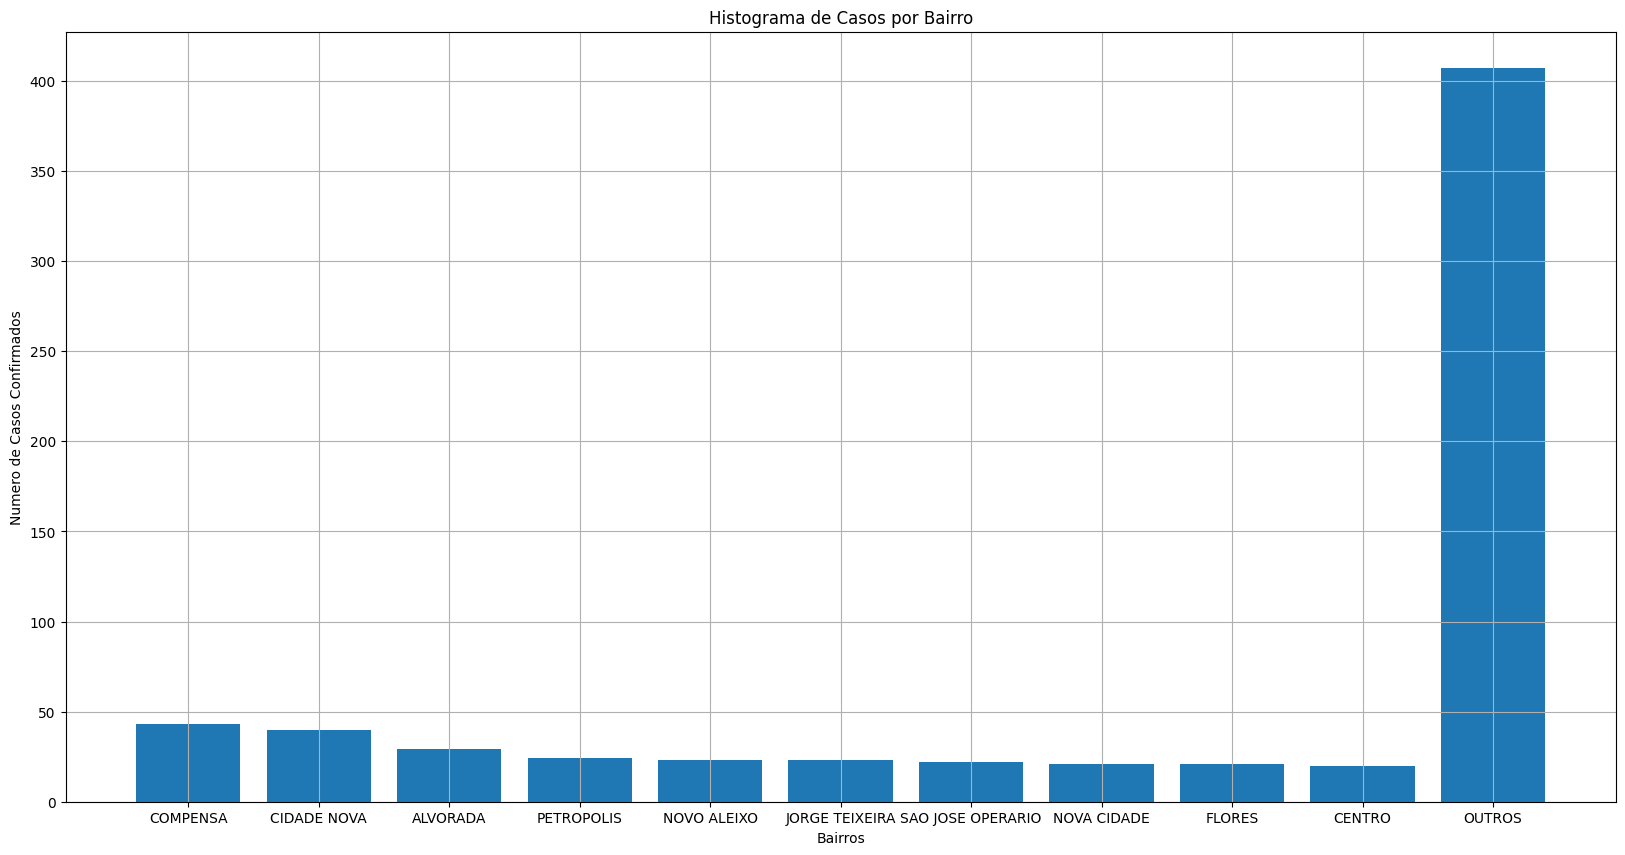

In [148]:
confirmed = data_clean.where(data_clean['_classificacao']== 'Confirmado').dropna()
total = len(confirmed)
districts = confirmed['_bairro'].value_counts()[:10].index.tolist()
district_cases = []
aux = 0
for district in districts:
    district_cases.append(len(confirmed.where(confirmed['_bairro'] == district).dropna()))
    aux += len(confirmed.where(confirmed['_bairro'] == district).dropna())
    
districts.append('OUTROS')
district_cases.append(total - aux)

plt.figure(figsize = (20, 10))
plt.title('Histograma de Casos por Bairro')
plt.xlabel('Bairros')
plt.ylabel('Numero de Casos Confirmados')
plt.grid(True)
plt.bar(districts, district_cases)

#### 2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

Nota-se a presença de Outliers no Boxplot de casos confirmados em pessoas do sexo masculino


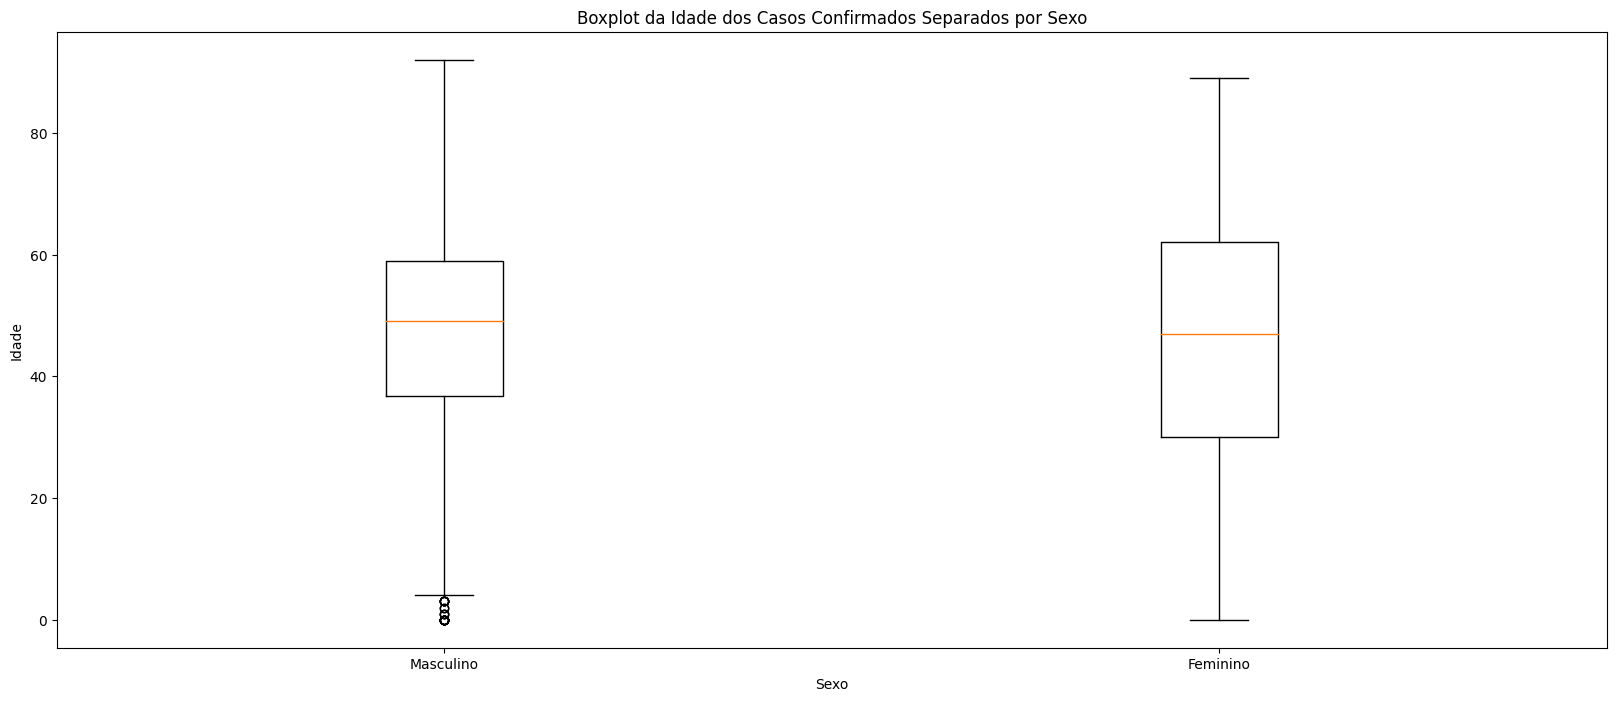

In [138]:
men = confirmed[confirmed._sexo=='M']
men = men['_idade']
women = confirmed[confirmed._sexo=='F']
women = women['_idade']

s_describe = {'M': 'Masculino', 'F':'Feminino'}

plt.figure(figsize = (20, 8))
plt.ylabel('Idade')
plt.xlabel('Sexo')
plt.title('Boxplot da Idade dos Casos Confirmados Separados por Sexo')
plt.boxplot([men, women], labels=['Masculino','Feminino'])
    
print('Nota-se a presença de Outliers no Boxplot de casos confirmados em pessoas do sexo masculino')

#### 3. Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados;

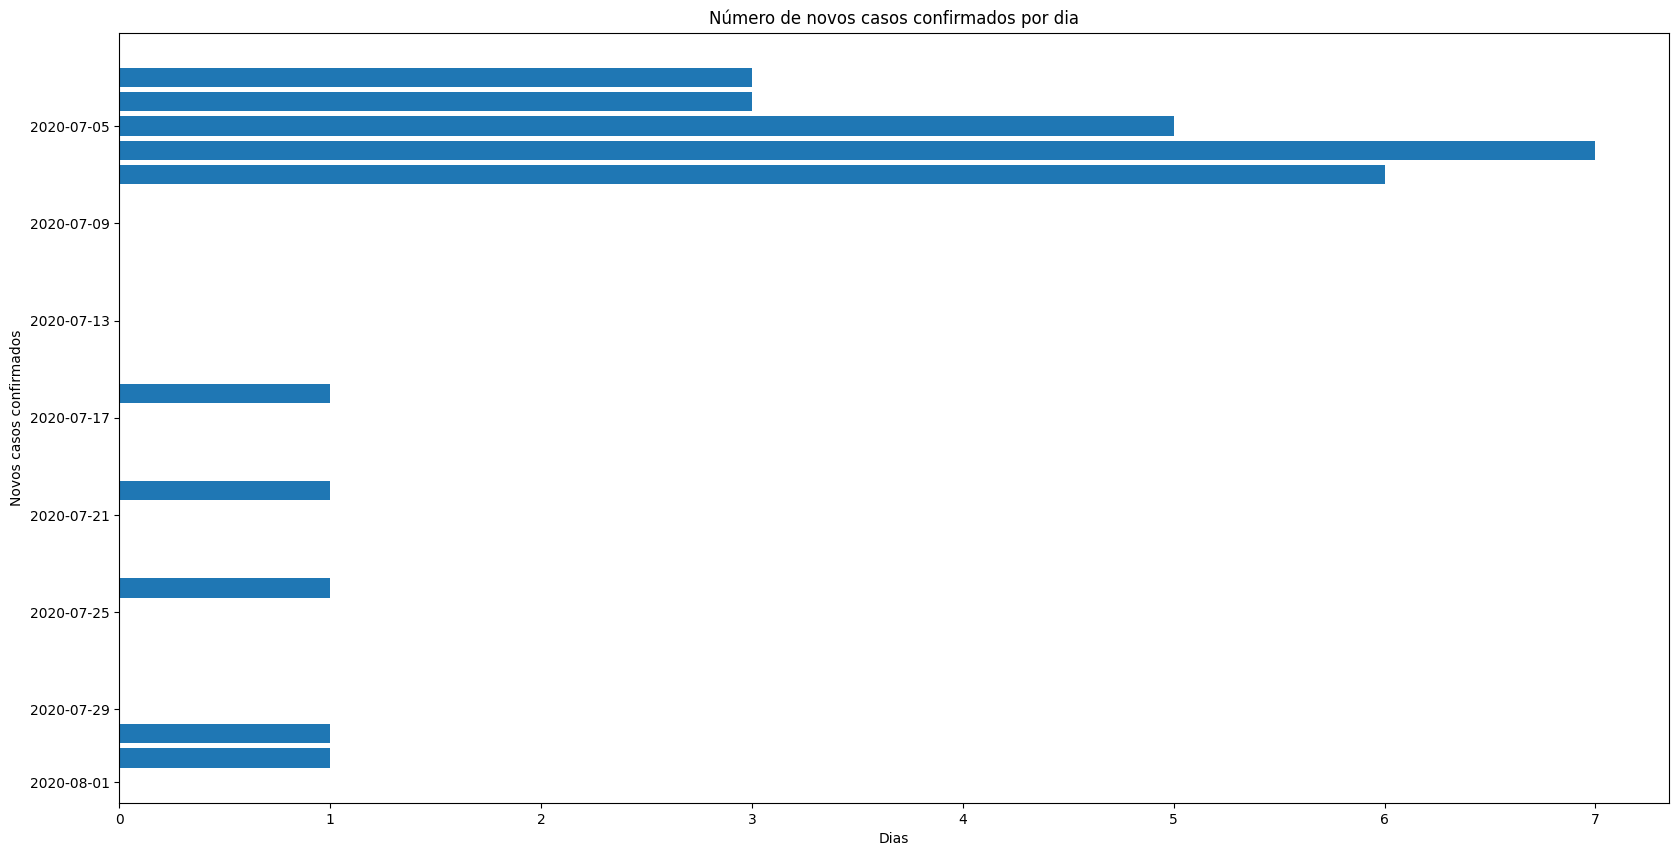

In [170]:
# get date_notification from confirmed dataframe
date_notification = confirmed['_dt_notificacao'].value_counts().sort_index(ascending=False)

# create view
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(20,10))

_date = [item.strftime("%d/%m/%Y") for item in date_notification.index[:10]]
_new_cases = date_notification.index[:10]

ax.barh(date_notification.index[:10], date_notification.values[:10])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Dias')
ax.set_ylabel('Novos casos confirmados')
ax.set_title('Número de novos casos confirmados por dia')

plt.show()

#### 4. Repita o gráfico anterior considerando o número de casos recuperados

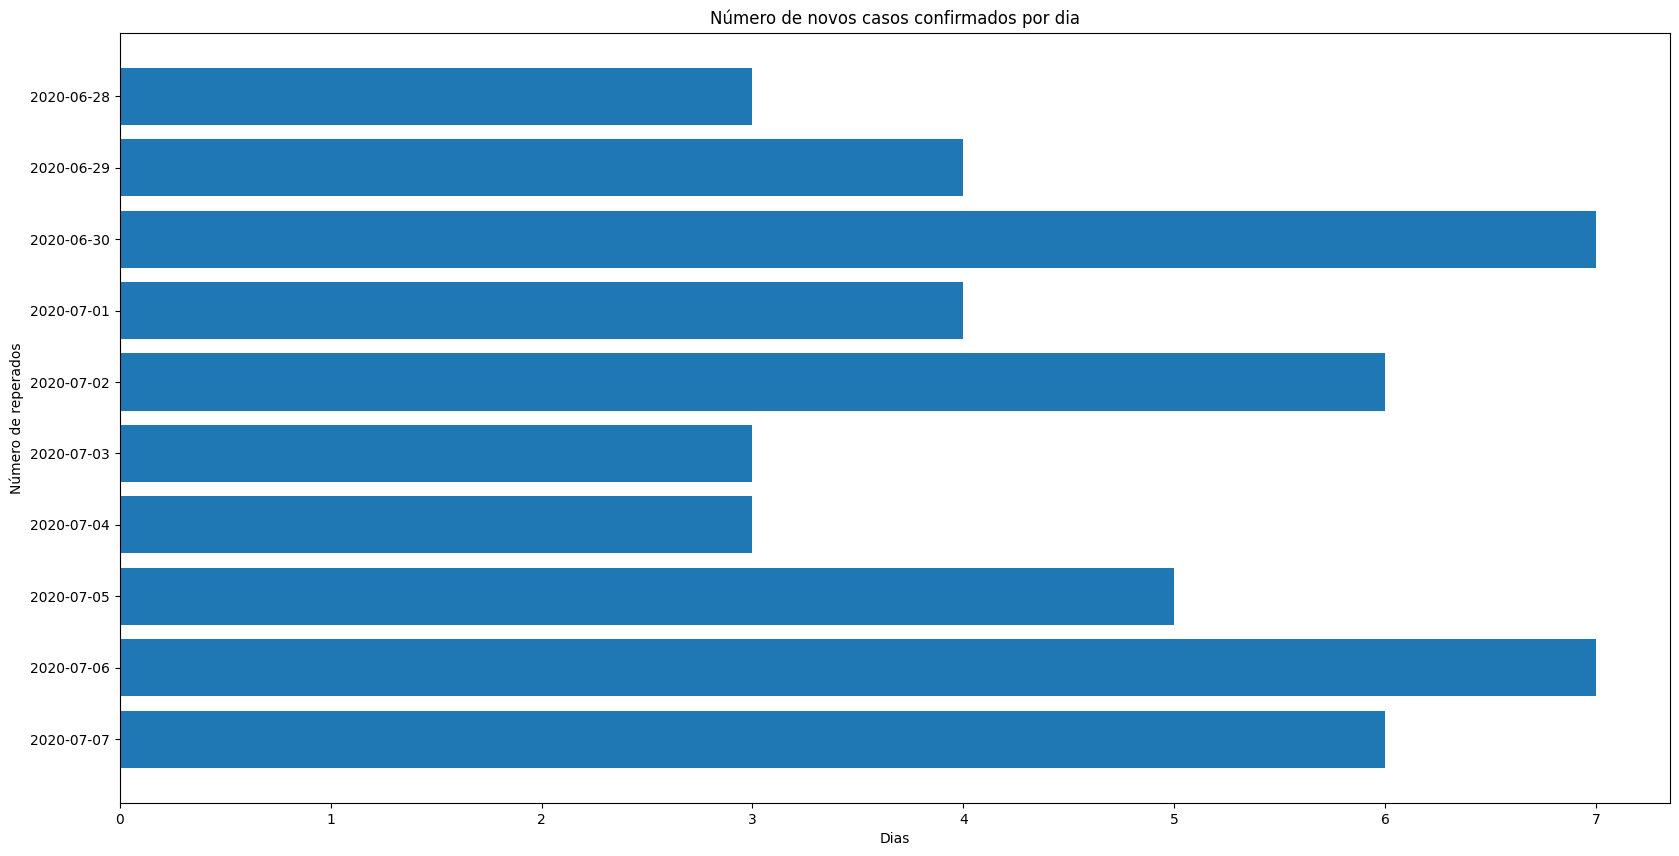

In [140]:
# get recovered dataframe
recoverd_df = confirmed.where(confirmed['_conclusao'] == 'Recuperado').dropna()

# get date_notification series from recoverd
date_notification = recoverd_df['_dt_notificacao'].value_counts()

# create date dataframe
frame = {'date': date_notification.index, 'new_cases': date_notification.values}
date_df = pandas.DataFrame(frame)
date_df = date_df.sort_values('date', ascending=False)

# create view
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(20,10))

ax.barh(date_df.head(10)['date'], date_df.head(10)['new_cases'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Dias')
ax.set_ylabel('Número de reperados')
ax.set_title('Número de novos casos confirmados por dia')

plt.show()

#### 5. Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 9 anos, 10 a 19 anos, etc.)

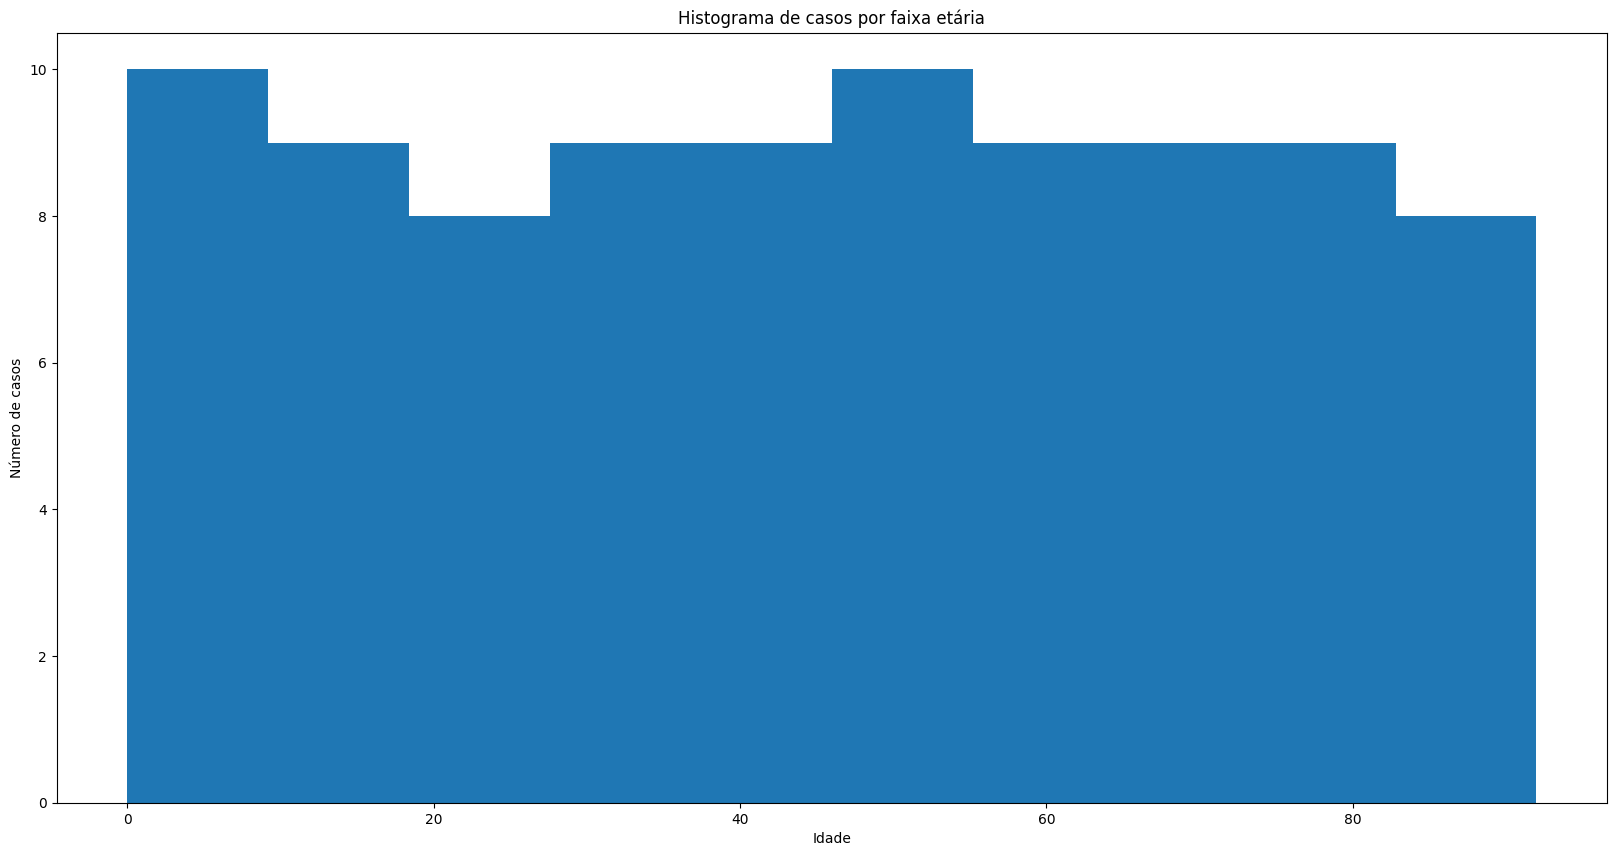

In [141]:
# get age/confirmed series
age_confirmed = confirmed['_idade'].value_counts()

# create new age dataframe
frame = {'age': age_confirmed.index, 'confirmed': age_confirmed.values}
age_df = pandas.DataFrame(frame)

# create view
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(20,10))

ax.hist(age_df['age'], bins=10)
ax.set_xlabel('Idade')
ax.set_ylabel('Número de casos')
ax.set_title('Histograma de casos por faixa etária')

plt.show()

#### 6. Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo

Text(0, 0.5, 'Número de casos')

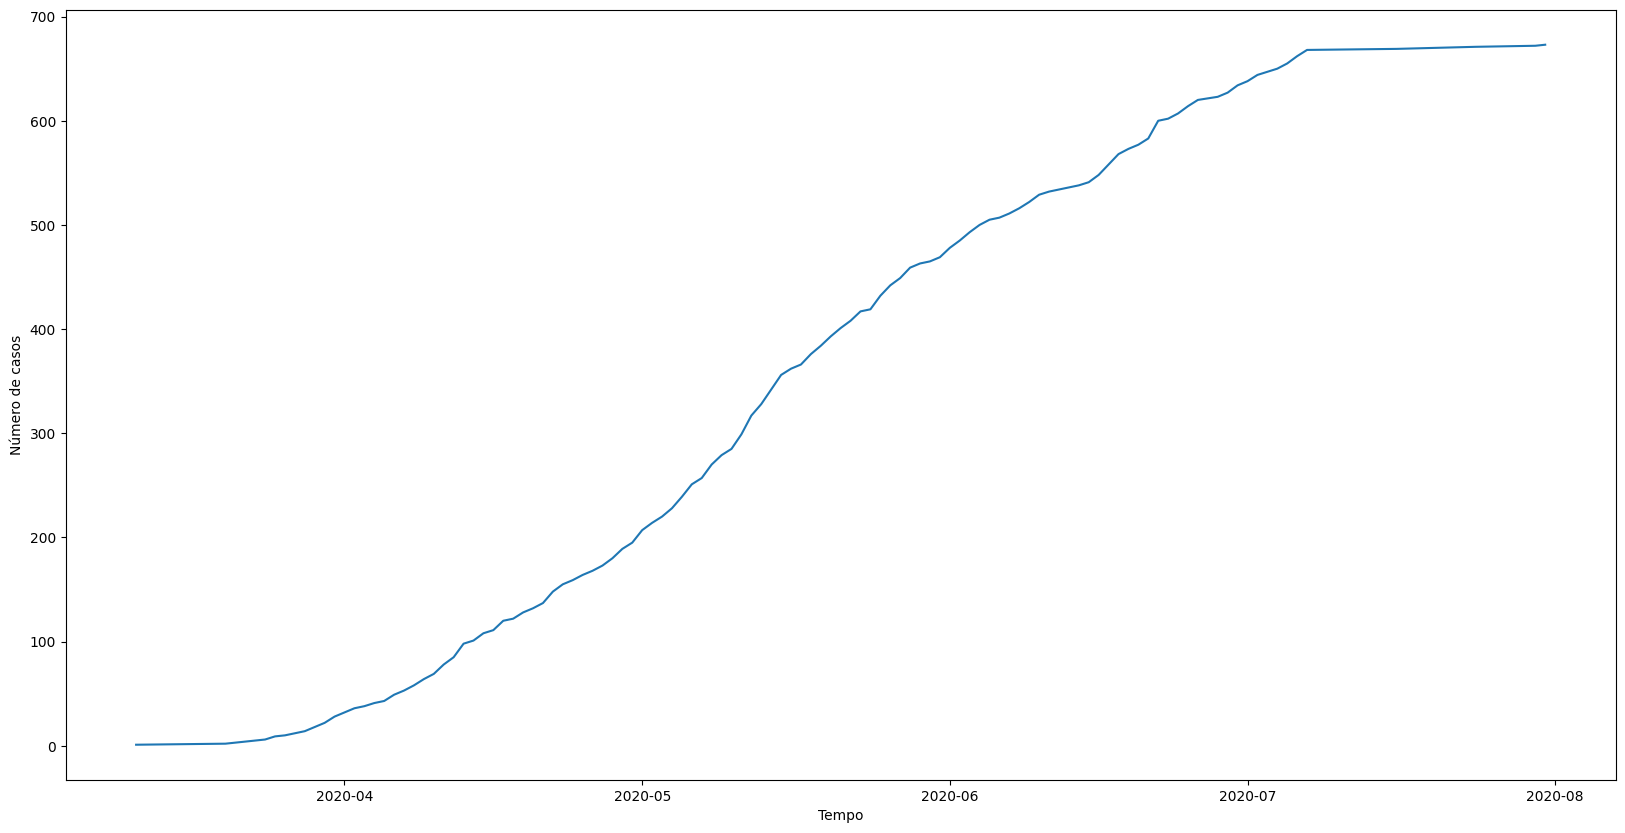

In [142]:
# get timeline
timeline = confirmed['_dt_notificacao'].value_counts()

# sort timeline
timeline = timeline.sort_index()

# cumulative sum of timeline
timeline = timeline.cumsum()

#create view
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(timeline.index, timeline.values)
ax.set_xlabel('Tempo')
ax.set_ylabel('Número de casos')

#### 7. Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?

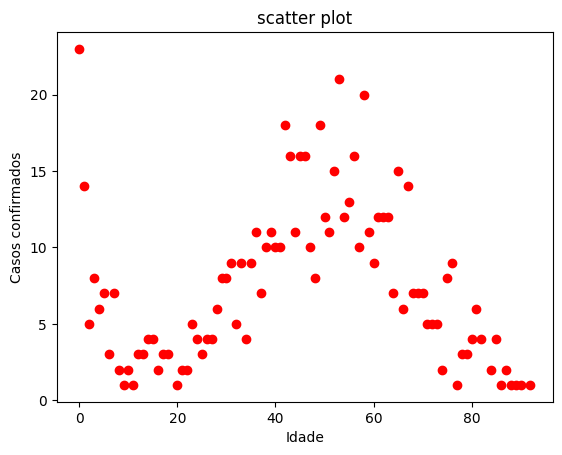

In [161]:
age_confirmed = confirmed['_idade'].value_counts()
_age = age_confirmed.index
_confirmed = age_confirmed.values

fig, ax = plt.subplots()
ax.scatter(_age, _confirmed, color='r')
ax.set_ylabel('Casos confirmados')
ax.set_xlabel('Idade')
ax.set_title('scatter plot')
plt.show()

É possível observar que o número de casos confirmados tende a ser maior entre pessoas na faixa etária de 40 a 60 anos.

Também é possível observar o outlier no campo superior esquerdo.